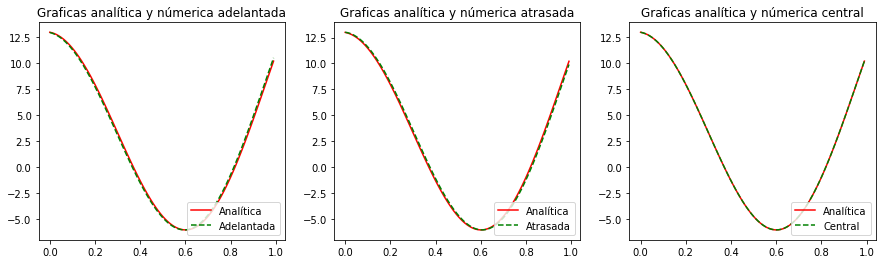

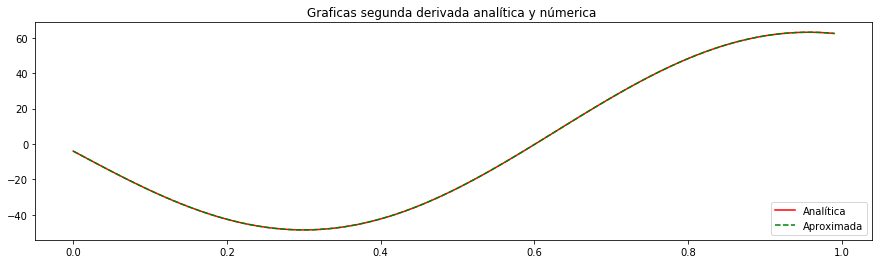

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt


#variable aleatoria
xt = np.arange(0,1,0.01)

#funcion analitica 
f  = lambda  x: 2*np.sin(5*x)+3*x**3-2*x**2+3*x-5
#primera derivada
fd = lambda x: 10*np.cos(5*x)+9*x**2-4*x+3
#segunda derivada
fdd = lambda x: -50*np.sin(5*x)+18*x-4




#aproximada de primera derivada 
afda = lambda x, dx: (f(x+dx)-f(x))/dx
#atrasada
afdt = lambda x, dx: (f(x)-f(x-dx))/dx
#centrada
afdc = lambda x,dx: (f(x+dx)-f(x-dx))/(2*dx)

#aproximada de segunda derivada 
afdda = lambda x, dx: (f(x+dx)-2*f(x)+f(x-dx))/(dx**2)

dx=0.01


#analitica
fa = f(xt)
fad = fd(xt)
fadd = fdd(xt)

#aproximada
fn = afda(xt,dx)
fna = afdt(xt,dx)
fnac = afdc(xt,dx)
fsa = afdda(xt,dx)


fig=plt.figure(figsize = (15,4))
a = fig.add_subplot(1, 3, 1)
plt.plot(xt,fad,'red', label='Analítica')
plt.plot(xt,fn,'g--', label='Adelantada')
a.set_title('Graficas analítica y númerica adelantada')
plt.legend(loc='lower right')

b = fig.add_subplot(1, 3, 2)
plt.plot(xt,fad,'red',label='Analítica')
plt.plot(xt,fna,'g--',label='Atrasada')
b.set_title('Graficas analítica y númerica atrasada')
plt.legend(loc='lower right')



c = fig.add_subplot(1, 3, 3)
plt.plot(xt,fad,'red',label='Analítica')
plt.plot(xt,fnac,'g--',label='Central')
c.set_title('Graficas analítica y númerica central')
plt.legend(loc='lower right')



plt.show()


#Segunda derivada
fig2=plt.figure(figsize = (15,4))
plt.plot(xt,fadd,'red', label='Analítica')
plt.plot(xt,fsa,'g--', label='Aproximada')
plt.title('Graficas segunda derivada analítica y númerica ')
plt.legend(loc='lower right')



In [23]:
#gradient one variable 
def gradient(x,delta):
    grad=np.zeros(2)
    grad[0]=(f([x[0]+delta,x[1]])- f([x[0]-delta,x[1]]))/(2*delta)
    grad[1]=(f([x[0],x[1]+delta])- f([x[0],x[1]-delta]))/(2*delta)
    return grad

In [24]:
def fu(x1,x2):
    U = 100*(np.sqrt(x1**2+(x2+1)**2)-1)**2 + 90*(np.sqrt(x1**2+(x2+1)**2)-1)**2 -(20*x1+40*x2)
    return U



In [25]:
import numpy as np
#import numpy.linalg as la
#import scipy.optimize as sopt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#from numpy import linalg as LA
%matplotlib qt

In [26]:
def gradient(x,delta):
    grad=np.zeros(2)
    grad[0]=(fu(x[0]+delta,x[1])- fu(x[0]-delta,x[1]))/(2*delta)
    grad[1]=(fu(x[0],x[1]+delta)- fu(x[0],x[1]-delta))/(2*delta)
    return grad

In [28]:
x1 = np.arange(-1, 1, 0.01)
x1len = len(x1)
x2 = np.arange(-1, 1, 0.01)
x2len = len(x2)
Ux=np.zeros((x1len,x2len));
for i in range(0,x1len):
    for j in range(0,x2len):
        Ux[i,j] =fu(x1[i],x2[j])
       

In [29]:
x1, x2 = np.meshgrid(x1, x2)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x1, x2, Ux, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()

In [41]:
dx1x1  = lambda  x,delta: (fu(x[0]+delta,x[1])-2*fu(x[0],x[1])+fu(x[0]-delta,x[1]))/delta**2
dx2x2 = lambda x, delta: (fu(x[0],x[1]+delta)-2*fu(x[0],x[1])+ fu(x[0],x[1]-delta))/delta**2

dx1x2 = lambda x,delta: (fu(x[0]+delta,x[1]+delta) - fu(x[0]+delta,x[1]-delta)-fu(x[0]-delta,x[1]+delta)+
                        fu(x[0]-delta,x[1]-delta))/(4*delta**2)

Hess = lambda x,delta: [[dx1x1(x,delta),dx1x2(x,delta)],[dx1x2(x,delta),dx2x2(x,delta)]]


dx1 = lambda x,delta: (fu(x[0]+delta,x[1])-fu(x[0]-delta,x[1]))/2*delta
dx2 = lambda x,delta: (fu(x[0],x[1]+delta)-fu(x[0],x[1]-delta))/2*delta

G = lambda x,delta: [(fu(x[0]+delta,x[1])-fu(x[0]-delta,x[1]))/2*delta,(fu(x[0],x[1]+delta)-fu(x[0],x[1]-delta))/2*delta]
                


In [42]:
delta =0.01

xi = [-1,1]



gradiente1 =  gradient(xi,delta)
gradiente2 = G(xi,delta)
H = Hess(xi,delta)
print(gradiente1)
print(gradiente2[0]*10000, gradiente2[1]*10000)
print(H)


[-230.06019323  380.11834719]
-230.06019322846214 380.1183471935247
[[244.0470669739625, -67.97578673882754], [-67.97578673882754, 346.0112569098328]]
